#Modelación de trayectorias de dispersión meteorológicas.

Integrantes:
- Jorge Sepúlveda R.
- Felipe Latorre N.

Profesor auxiliar: Álvaro Márquez

##Métodos previos necesarios

In [ ]:
#importar librerías
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from scipy import special

#definir movimientos brownianos
def BrownianTrajectories(x,T,K,seed=None):
    #para fijar en caso de querer estudiar bajo los mismos brownianos
    np.random.seed(seed)
    N = x.shape[0]
    t = np.linspace(0,T,K) #Grilla t
    B = np.zeros((N,K)) #Crea la matriz de Browniano "vacía"
    for n in range(N):
        Z = np.sqrt(T/K)*np.random.normal(size=K)
        Y = np.zeros(K)
        Y = Z
        Y[0] = x[n]
        B[n,0:]=np.cumsum(Y)
    return t, B



## Modelo teórico

Los modelos de dispersión Lagrangeanos (LPDMs) son usados para simular la trayectoria de grandes cantidades de partículas, en nuestro caso una corriente atmosférica. Para nuestro proyecto estaremos evaluando el comportamiento de estas corrientes atmosféricas en la capa límite atmosférica (ABL), la capa más baja de la atmósfera.
Además de comprender la formulación estocástica de estas LPDMs, se evaluará el rendimiento de algunos esquemas para la resolución numérica de las ecuaciones. En general, nos enfocaremos sobre el modelamiento unidimensional de las corrientes sobre el eje vertical en la ABL.
 En la ABL podemos determinar tres tipos de comportamientos:
-	Inestable: Esto ocurre en el día cuando la superficie se calienta, que genera un efecto termal de corrientes convectivas ascendentes y descendentes.
-	Estable: Ocurre mayormente de noches, el nivel de turbulencia decrece con la altura debido al enfriamiento de la superficie.
-	Neutral: En la ausencia de procesos termales, cuando la ABL se encuentra con bastante viento y nublada.
El modelo es estrictamente válido sólo para condiciones estables y neutrales.

Se estudian la posición y velocidad de una partícula 3 dimensional, dígase $X_t = (x_t,y_t,z_t)$ y $V_t=(vx_t,vy_t,W_t)$ con $dX_t = V_t dt$, para estas partículas se asume una turbulencia gaussiana (es decir, la distribución del aire _backgroud_ distribuye como una Gaussiana), para el análisis atmosférico se limita a estudiar solo la altura y velocidad vertical, pues las variaciones horizontales son pequeñas.

Para el modelo se asumirá que las variaciones en el eje horizontal son lo suficientemente lentas como para aportar en la variación vertical. De ello se considerará solamente la ecuación unidimensional del movimiento $(Z_t, W_t)$

El modelo inicial para la velocidad vertical es una turbulencia Gaussiana homogenea isotrópica dada por la ecuación de Langevin, esto es $$dW_t = -\frac{W_t}{τ_w}dt + b_w d \xi _t \space ,\space\space W_0
 \sim N(o,σ_w ^2)$$

Luego, $τ_w$ es el tiempo de decorrelacion lagrangiano, $\xi _t$ es un proceso aleatorio y $σ_w ^2$ es la varianza del turbulente de velocidad que cumple que $σ_w ^2 = ⟨W^2_t⟩ = ⟨W^2_0⟩$, estas funciones serán sujetas a estudio.

Sigue qué, por análisis estadísticos $b_w$ está dado por, $⟨W^2_t⟩ = ⟨W^2_0⟩e^{-2t/τ_w} + \frac{1}{2} b^2_w τ_w(1-e^{-2t/τ_w})$, y usando la hipótesis sobre $σ^2_w$, resulta que $b_w = (\frac{2σ^2_w}{τ_w})^{1/2}$, pero lo anterior era un modelo para determinar $b_w$, el modelo RFM (random flight model) es el siguiente:
$$dW_t = a_w(Z_t,W_t,t)dt + b_w(Z_t,W_t,t) dB _t$$ $$dZ_t = W_t dt$$

Para determinar a_w se tiene que estudiar la evolución temporal de la densidad de probabilidad de la VA $(Z_t,W_t)$, esto es:

$$p_t = -(wp)_z - (a_w(z,w,t)p)_w + \frac{1}{2}(b^2_w(z,w,t)p)_{ww}$$, considerando $p_e(z,w)$ la densidad de distribución de las partículas de aire que se asumieron con velocidad Gaussiana y considerando que $(p_e)_t = 0$ se llega a lo siguiente

$$a_w p_e = \frac{1}{2} (b^2_w p_e)_w - \int_{-∞}^{w} \frac{∂}{∂z} p_e(z,w')w'dw'$$, por el análisis anterior sobre b se obtiene que

$$a_w(z,w,t) = -\frac{w}{t_w} + σ_w(σ_w)_z + \frac{w^2}{σ_w}(σ_w)_z$$

Dando la formulación real del problema como sigue:

$$dW_t = \left( \frac{W_t}{\tau_w} + \frac{1}{2}(1 + \frac{W^2_t}{σ^2_w})\frac{∂σ^2_w}{∂z} \right)dt + \left( \frac{2σ^2_w}{τ_w} \right)^{\frac{1}{2}} dB_t,\\dZ_t = W_tdt$$

Luego a las ecuaciones anteriores se les puede hacer un cambio de variable conveniente para trabajar mejor sobre ellas, como sigue:

$$ Ω_t = \frac{W_t}{σ_w}, \\ dΩ_t = \left( -\frac{Ω_t}{τ_w} + \frac{∂σ_w}{∂z} \right)dt +\left( \frac{2}{τ_w} \right)^\frac{1}{2}dB_t\space,\space\space Ω_0 \sim N(0,1), \\ dZ_t = Ω_tσ_wdt \space,\space\space Z_0 \sim N(z_0,σ^2_z)$$

## Introducción
El estudio de las corrientes atmosféricas ha sido muy importante para simular el transporte a gran escala de partículas en formas de corrientes atmosféricas, por ejemplo polutantes, para el manejo de la seguridad medioambiental y de la población. Un ejemplo de ello es la predicción de la trayectoria de las fumarolas de volcanes después de erupcionar, los cuales contienen mezclas de gases a alta temperatura y dañinos para la salud del entorno.

En general, el modelamiento de este sistema de partículas a gran escala posee dificultades notorias al tratar de aplicar un enfoque Euleriano (esto es modelar el sistema completo determinísticamente), de lo cual se ha preferido adoptar un enfoque más estocástico con modelos Lagrangeanos. Las ventajas de este enfoque son por ejemplo que es mucho más eficiente computacionalmente dado que no modela el dominio completo del problema o también se puede asegurar que la masa del sistema se conserva pues se tiene un total seguimiento del sistema modelado.

##Implementación

Como se mencionó en las ideas del proyecto, inicialmente se resolvera el sistema de EDEs con los métodos de Euler y Milstein.

In [ ]:
#definir función b, depende de omega, la derivada en altura de sigma, tau y la altura
def b(Ω,dσ,τ,z):
    return -Ω/τ(z) + dσ(z)

#por Ito esta solo depende de tau
def s(τ,z):
    return np.sqrt(2/τ(z))

Definir los métodos numéricos a usar

In [ ]:
#método de euler
def SDEEuler(N,K,T,t0,x0,b,s,τ,σ,dσ,B=None,seed=None):
    initial = np.zeros(N) #trayectorias
    try: #si se mantiene None entonces corre esto
      assert(B==None)
      t, B = BrownianTrajectories(initial,T,K,seed)
      h = T/K
      O = np.zeros((N,K))
      Z = np.zeros((N,K))
      O[:,0]=t0
      Z[:,0]=x0
      for i in range(N):
          for j in range(1,K):
              O[i,j] = O[i,j-1] + b(O[i,j-1],dσ,τ,Z[i,j-1])*h + s(τ,Z[i,j-1])*(B[i,j]-B[i,j-1])
              Z[i,j] = Z[i,j-1] + O[i,j-1]*σ(Z[i,j-1])*h
              if Z[i,j] > 1: #condiciones de borde Z>1
                Z[i,j] = -(Z[i,j] - 1) + 1
                O[i,j] = -O[i,j]
              elif Z[i,j] < 0: #condiciones de borde Z<0
                Z[i,j] = -Z[i,j]
                O[i,j] = -O[i,j]
      return t, B, O, Z
    except: #si ingresamos un browniano predefinido
      t = np.linspace(0,T,K)
      h = T/K
      O = np.zeros((N,K))
      Z = np.zeros((N,K))
      O[:,0]=t0
      Z[:,0]=x0
      for i in range(N):
          for j in range(1,K):
              O[i,j] = O[i,j-1] + b(O[i,j-1],dσ,τ,Z[i,j-1])*h + s(τ,Z[i,j-1])*(B[i,j]-B[i,j-1])
              Z[i,j] = Z[i,j-1] + O[i,j-1]*σ(Z[i,j-1])*h
              if Z[i,j] > 1: #condiciones de borde Z>1
                Z[i,j] = -(Z[i,j] - 1) + 1
                O[i,j] = -O[i,j]
              elif Z[i,j] < 0: #condiciones de borde Z<0
                Z[i,j] = -Z[i,j]
                O[i,j] = -O[i,j]
      return t, B, O, Z


#método de Milstein
def SDEMilstein(N,K,T,t0,x0,b,s,τ,σ,dσ,B=None,seed=None):
    initial = np.zeros(N) #trayectorias
    try: #si se mantiene None entonces corre esto
      assert(B==None)
      t, B = BrownianTrajectories(initial,T,K,seed)
      h = T/K
      O = np.zeros((N,K))
      Z = np.zeros((N,K))
      O[:,0]=t0
      Z[:,0]=x0
      for i in range(N):
          for j in range(1,K):
              seg_ord = 0.5*σ(Z[i,j-1])*dσ(Z[i,j-1])*((B[i,j]-B[i,j-1])**2 - h)
              O[i,j] = O[i,j-1] + b(O[i,j-1],dσ,τ,Z[i,j-1])*h + s(τ,Z[i,j-1])*(B[i,j]-B[i,j-1]) + seg_ord
              Z[i,j] = Z[i,j-1] + O[i,j-1]*σ(Z[i,j-1])*h
              if Z[i,j] > 1: #condiciones de borde Z>1
                Z[i,j] = -(Z[i,j] - 1) + 1
                O[i,j] = -O[i,j]
              elif Z[i,j] < 0: #condiciones de borde Z<0
                Z[i,j] = -Z[i,j]
                O[i,j] = -O[i,j]
      return t, B, O, Z
    except: #si ingresamos un browniano predefinido
      t = np.linspace(0,T,K)
      h = T/K
      O = np.zeros((N,K))
      Z = np.zeros((N,K))
      O[:,0]=t0
      Z[:,0]=x0
      for i in range(N):
          for j in range(1,K):
              seg_ord = 0.5*σ(Z[i,j-1])*dσ(Z[i,j-1])*((B[i,j]-B[i,j-1])**2 - h)
              O[i,j] = O[i,j-1] + b(O[i,j-1],dσ,τ,Z[i,j-1])*h + s(τ,Z[i,j-1])*(B[i,j]-B[i,j-1]) + seg_ord
              Z[i,j] = Z[i,j-1] + O[i,j-1]*σ(Z[i,j-1])*h
              if Z[i,j] > 1: #condiciones de borde Z>1
                Z[i,j] = -(Z[i,j] - 1) + 1
                O[i,j] = -O[i,j]
              elif Z[i,j] < 0: #condiciones de borde Z<0
                Z[i,j] = -Z[i,j]
                O[i,j] = -O[i,j]
      return t, B, O, Z

#método HON-SRKII
def SDEHonskr(N,K,T,t0,x0,b,s,τ,σ,dσ,B=None,seed=None):
    initial = np.zeros(N) #trayectorias
    try: #si se mantiene None entonces corre esto
      assert(B==None)
      t, B = BrownianTrajectories(initial,T,K,seed)
      h = T/K
      O = np.zeros((N,K))
      Z = np.zeros((N,K))
      O[:,0]=t0
      Z[:,0]=x0
      for i in range(N):
          for j in range(1,K):
              Oμ = O[i,j-1] + b(O[i,j-1],dσ,τ,Z[i,j-1])*h + s(τ,Z[i,j-1])*(B[i,j]-B[i,j-1])
              Zμ = Z[i,j-1] + O[i,j-1]*σ(Z[i,j-1])*h
              Fμ = b(Oμ,dσ,τ,Zμ)
              O[i,j] = O[i,j-1] + 1/2*(b(O[i,j-1],dσ,τ,Z[i,j-1]) + Fμ)*h + s(τ,Z[i,j-1])*(B[i,j]-B[i,j-1])
              Z[i,j] = Z[i,j-1] + 1/2*(O[i,j-1]*σ(Z[i,j-1]) + Oμ*σ(Zμ))*h
              if Z[i,j] > 1: #condiciones de borde Z>1
                Z[i,j] = -(Z[i,j] - 1) + 1
                O[i,j] = -O[i,j]
              elif Z[i,j] < 0: #condiciones de borde Z<0
                Z[i,j] = -Z[i,j]
                O[i,j] = -O[i,j]
      return t, B, O, Z
    except: #si ingresamos un browniano predefinido
      t = np.linspace(0,T,K)
      h = T/K
      O = np.zeros((N,K))
      Z = np.zeros((N,K))
      O[:,0]=t0
      Z[:,0]=x0
      for i in range(N):
          for j in range(1,K):
              Oμ = O[i,j-1] + b(O[i,j-1],dσ,τ,Z[i,j-1])*h + s(τ,Z[i,j-1])*(B[i,j]-B[i,j-1])
              Zμ = Z[i,j-1] + O[i,j-1]*σ(Z[i,j-1])*h
              Fμ = b(Oμ,dσ,τ,Zμ)
              O[i,j] = O[i,j-1] + 1/2*(b(O[i,j-1],dσ,τ,Z[i,j-1]) + Fμ)*h + s(τ,Z[i,j-1])*(B[i,j]-B[i,j-1])
              Z[i,j] = Z[i,j-1] + 1/2*(O[i,j-1]*σ(Z[i,j-1]) + Oμ*σ(Zμ))*h
              if Z[i,j] > 1: #condiciones de borde Z>1
                Z[i,j] = -(Z[i,j] - 1) + 1
                O[i,j] = -O[i,j]
              elif Z[i,j] < 0: #condiciones de borde Z<0
                Z[i,j] = -Z[i,j]
                O[i,j] = -O[i,j]
      return t, B, O, Z


#método de Leggraup
def SDELeggraup(N,K,T,t0,x0,b,s,τ,σ,dσ,B=None,seed=None):
    initial = np.zeros(N) #trayectorias
    try: #si se mantiene None entonces corre esto
      assert(B==None)
      t, B = BrownianTrajectories(initial,T,K,seed)
      h = T/K
      O = np.zeros((N,K))
      Z = np.zeros((N,K))
      O[:,0]=t0
      Z[:,0]=x0
      for i in range(N):
          for j in range(1,K):
              Δ = np.random.normal() #paso 1 leggraup
              R = np.exp(-h/τ(Z[i,j-1])) #paso 2 leggraup
              O[i,j] = R*O[i,j-1] + dσ(Z[i,j-1])*τ(Z[i,j-1])*(1 - R) + ((1 - R**2)**1/2)*Δ
              Z[i,j] = Z[i,j-1] + σ(Z[i,j-1])*O[i,j-1]*Δ
              if Z[i,j] > 1: #condiciones de borde Z>1
                Z[i,j] = -(Z[i,j] - 1) + 1
                O[i,j] = -O[i,j]
              elif Z[i,j] < 0: #condiciones de borde Z<0
                Z[i,j] = -Z[i,j]
                O[i,j] = -O[i,j]
      return t, B, O, Z
    except: #si ingresamos un browniano predefinido
      t = np.linspace(0,T,K)
      h = T/K
      O = np.zeros((N,K))
      Z = np.zeros((N,K))
      O[:,0]=t0
      Z[:,0]=x0
      for i in range(N):
          for j in range(1,K):
              Δ = np.random.normal()
              R = np.exp(-h/τ(Z[i,j-1]))
              O[i,j] = R*O[i,j-1] + dσ(Z[i,j-1])*τ(Z[i,j-1])*(1 - R) + (1 - R**2)**1/2*Δ
              Z[i,j] = Z[i,j-1] + σ(Z[i,j-1])*O[i,j-1]*Δ
              if Z[i,j] > 1: #condiciones de borde Z>1
                Z[i,j] = -(Z[i,j] - 1) + 1
                O[i,j] = -O[i,j]
              elif Z[i,j] < 0: #condiciones de borde Z<0
                Z[i,j] = -Z[i,j]
                O[i,j] = -O[i,j]
      return t, B, O, Z

##Análisis
En la tesis se detallan 3 modelos para $σ_w$ y $τ_w$, se analizará por separado cada uno de los siguientes modelos empíricos:
1.   Comportamiento inestable: $σ_w(z) = 0.5(1+z)$ y $τ_w(z)=cte$
2.   Comportamiento estable: $σ_w(z) = 1.3(1+z)$ y $τ_w(z)=\frac{0.1 z^{4/5}}{σ_w}$
3.   Comportamiento neutral: $σ_w(z) = 1.3e^{\frac{-2z}{ϵ}}$ y $τ_w(z)=\frac{z}{2σ_w(1+15z/ϵ)}$ con ϵ=0.8 en la tesis.



In [ ]:
cte = 0.1
eps = 0.8
σ = [lambda z: 0.5*(1+z),lambda z: 1.3*(1-z),lambda z: 1.3*np.exp(-2*z/eps)]
dσ = [lambda z: 0.5,lambda z: -1.3,lambda z: -2.6/eps * np.exp(-2*z/eps)]
τ = [lambda z: cte,lambda z: 0.1*z**(4/5)/σ[1](z), lambda z: z/(2*σ[2](z)*(1+15*z/eps))]

In [ ]:
N = 10 #estudiar 10 trayectorias
T = 1 #estudiar una unidad de tiempo
K = 10**3 #con 1000 particiones
t0 = 0 #iniciando desde el 0
x0 = 0.5 #para un análisis inicial, considerar la posición inicial a la mitad del trayecto, no una distribución
initial = np.zeros(N)
B_test = BrownianTrajectories(initial,T,K,seed=42)[1] #fijar un set de brownianos

##Plots caso inestable

In [ ]:
#definir elementos base para el caso intestable
sig_ines = σ[0]
dsig_ines = dσ[0]
tau_ines = τ[0]

In [ ]:
#Euler
#generar las 10 trayectorias con el browniano fijo
t_ines_euler, B_ines_euler, O_ines_euler, Z_ines_euler = SDEEuler(N,K,T,t0,x0,b,s,tau_ines,sig_ines,dsig_ines,B=B_test)
W_ines_euler = np.zeros((N,K))
for j in range(N):
  for i in range(K):
      W_ines_euler[j,i] = O_ines_euler[j,i]*Z_ines_euler[j,i]

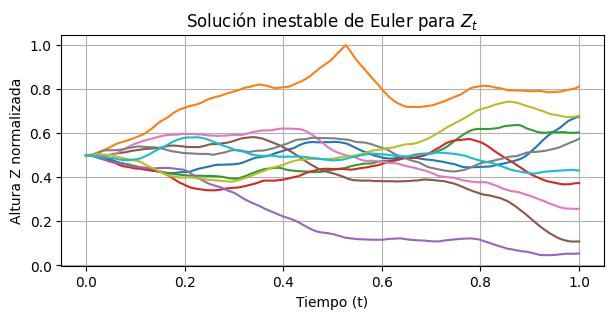

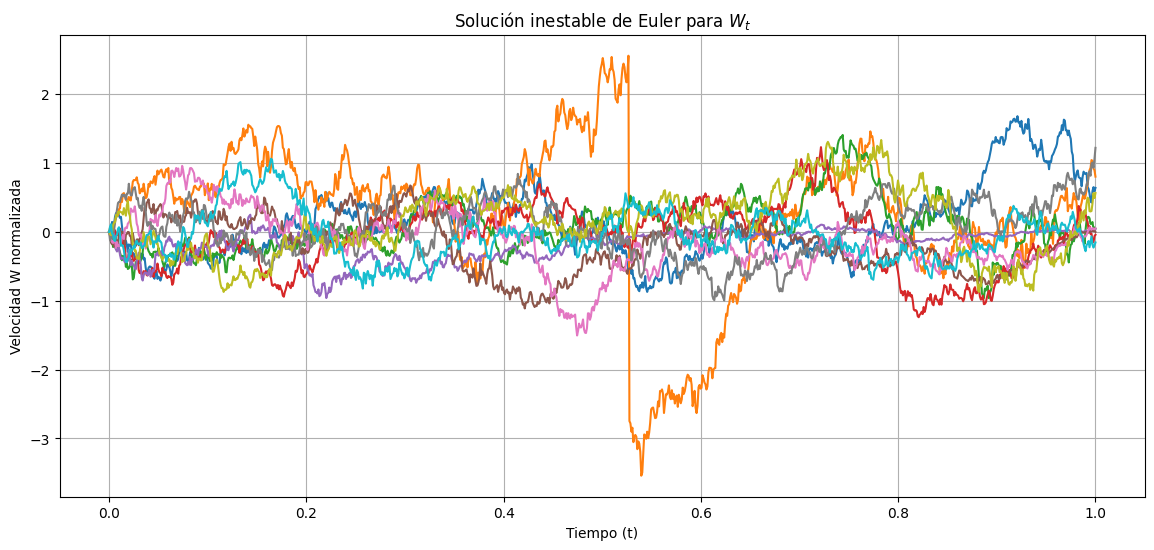

In [39]:
plt.figure(figsize=(7, 3))
for j in range(N):
  plt.plot(t_ines_euler, Z_ines_euler[j], label='Altura del flujo atmosferico ' + str(j))#plottear la altura
plt.title(f'Solución inestable de Euler para $Z_t$')
plt.xlabel('Tiempo (t)')
plt.ylabel('Altura Z normalizada')
plt.grid(True)
plt.show()

plt.figure(figsize=(14, 6))
for j in range(N):
  plt.plot(t_ines_euler, W_ines_euler[j], label='Velocidad del flujo atmosferico ' + str(j))#plottear la velocidad
plt.title(f'Solución inestable de Euler para $W_t$')
plt.xlabel('Tiempo (t)')
plt.ylabel('Velocidad W normalizada')
plt.grid(True)
plt.show()

In [ ]:
#Milstein
#generar las 10 trayectorias con el browniano fijo
t_ines_milst, B_ines_milst, O_ines_milst, Z_ines_milst = SDEMilstein(N,K,T,t0,x0,b,s,tau_ines,sig_ines,dsig_ines,B=B_test)
W_ines_milst = np.zeros((N,K))
for j in range(N):
  for i in range(K):
      W_ines_milst[j,i] = O_ines_milst[j,i]*Z_ines_milst[j,i]

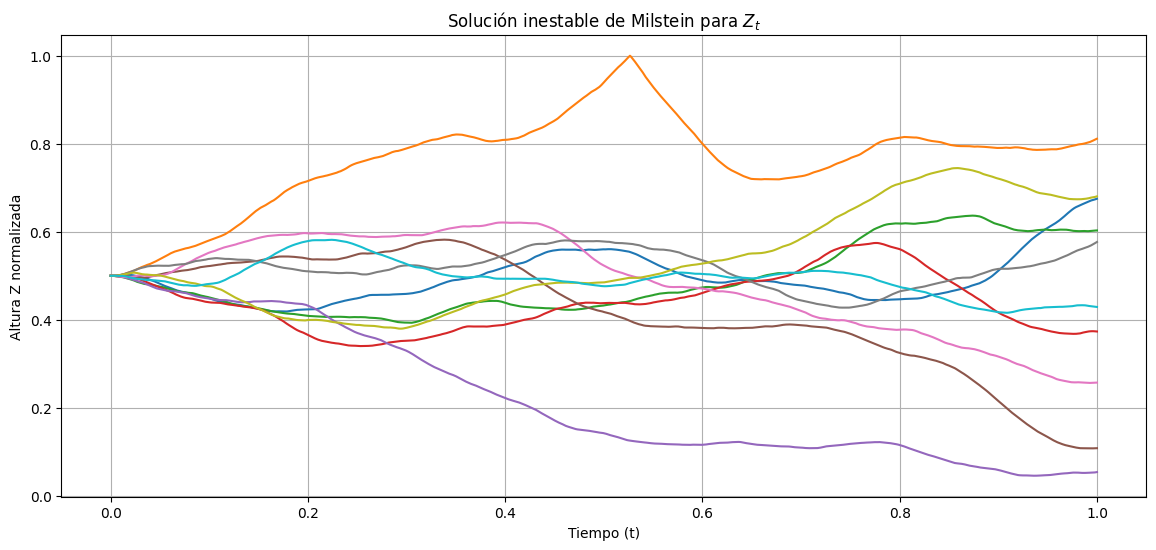

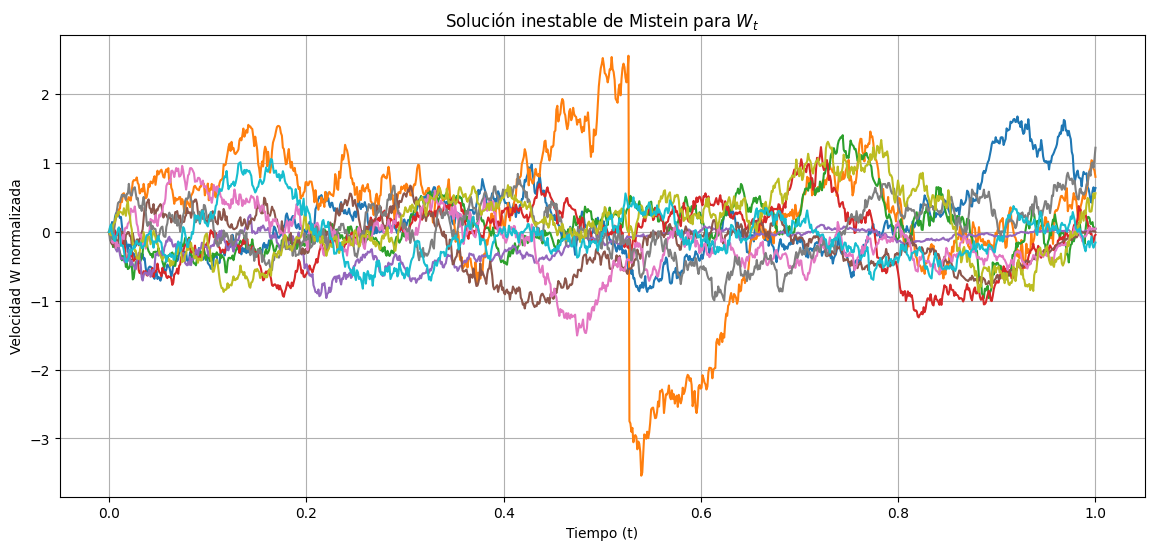

In [ ]:
plt.figure(figsize=(14, 6))
for j in range(N):
  plt.plot(t_ines_milst, Z_ines_milst[j], label='Altura del flujo atmosferico ' + str(j))#plottear la altura
plt.title(f'Solución inestable de Milstein para $Z_t$')
plt.xlabel('Tiempo (t)')
plt.ylabel('Altura Z normalizada')
plt.grid(True)
plt.show()

plt.figure(figsize=(14, 6))
for j in range(N):
  plt.plot(t_ines_milst, W_ines_milst[j], label='Velocidad del flujo atmosferico ' + str(j))#plottear la velocidad
plt.title(f'Solución inestable de Mistein para $W_t$')
plt.xlabel('Tiempo (t)')
plt.ylabel('Velocidad W normalizada')
plt.grid(True)
plt.show()

In [ ]:
#Honskrii
#generar las 10 trayectorias con el browniano fijo
t_ines_honsk, B_ines_honsk, O_ines_honsk, Z_ines_honsk = SDEHonskr(N,K,T,t0,x0,b,s,tau_ines,sig_ines,dsig_ines,B=B_test)
W_ines_honsk = np.zeros((N,K))
for j in range(N):
  for i in range(K):
      W_ines_honsk[j,i] = O_ines_honsk[j,i]*Z_ines_honsk[j,i]

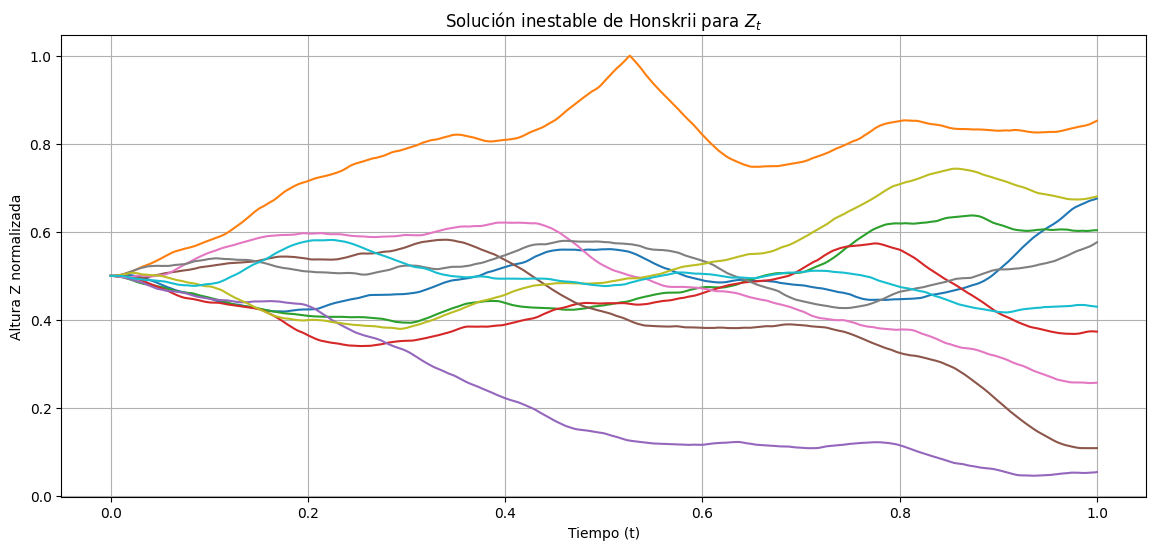

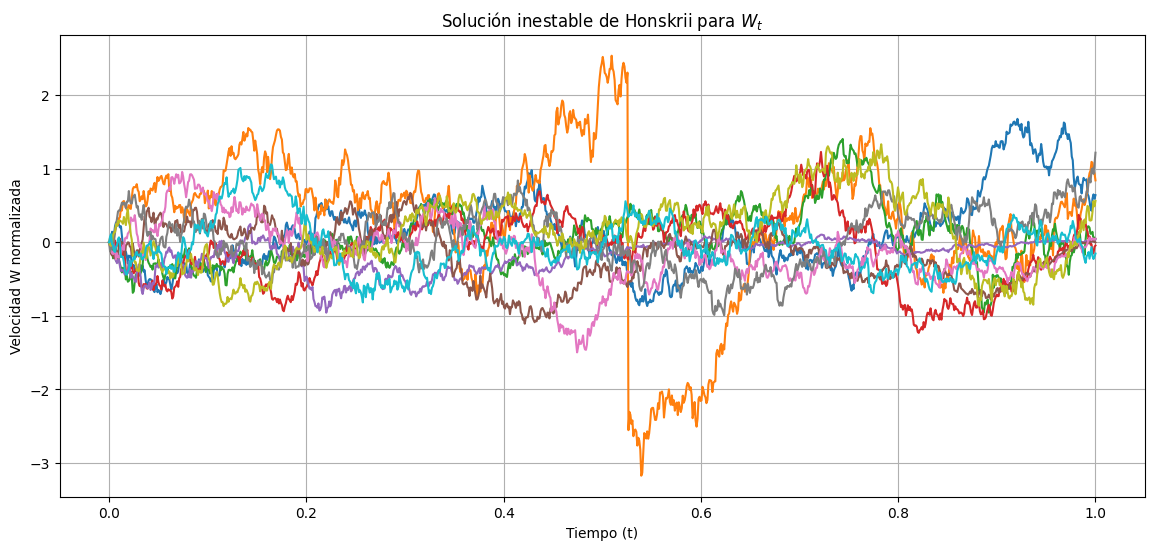

In [ ]:
plt.figure(figsize=(14, 6))
for j in range(N):
  plt.plot(t_ines_honsk, Z_ines_honsk[j], label='Altura del flujo atmosferico ' + str(j))#plottear la altura
plt.title(f'Solución inestable de Honskrii para $Z_t$')
plt.xlabel('Tiempo (t)')
plt.ylabel('Altura Z normalizada')
plt.grid(True)
plt.show()

plt.figure(figsize=(14, 6))
for j in range(N):
  plt.plot(t_ines_honsk, W_ines_honsk[j], label='Velocidad del flujo atmosferico ' + str(j))#plottear la velocidad
plt.title(f'Solución inestable de Honskrii para $W_t$')
plt.xlabel('Tiempo (t)')
plt.ylabel('Velocidad W normalizada')
plt.grid(True)
plt.show()

In [ ]:
#Leggraup
#generar las 10 trayectorias con el browniano fijo
t_ines_leggr, B_ines_leggr, O_ines_leggr, Z_ines_leggr = SDELeggraup(N,K,T,t0,x0,b,s,tau_ines,sig_ines,dsig_ines,B=B_test)
W_ines_leggr = np.zeros((N,K))
for j in range(N):
  for i in range(K):
      W_ines_leggr[j,i] = O_ines_leggr[j,i]*Z_ines_leggr[j,i]

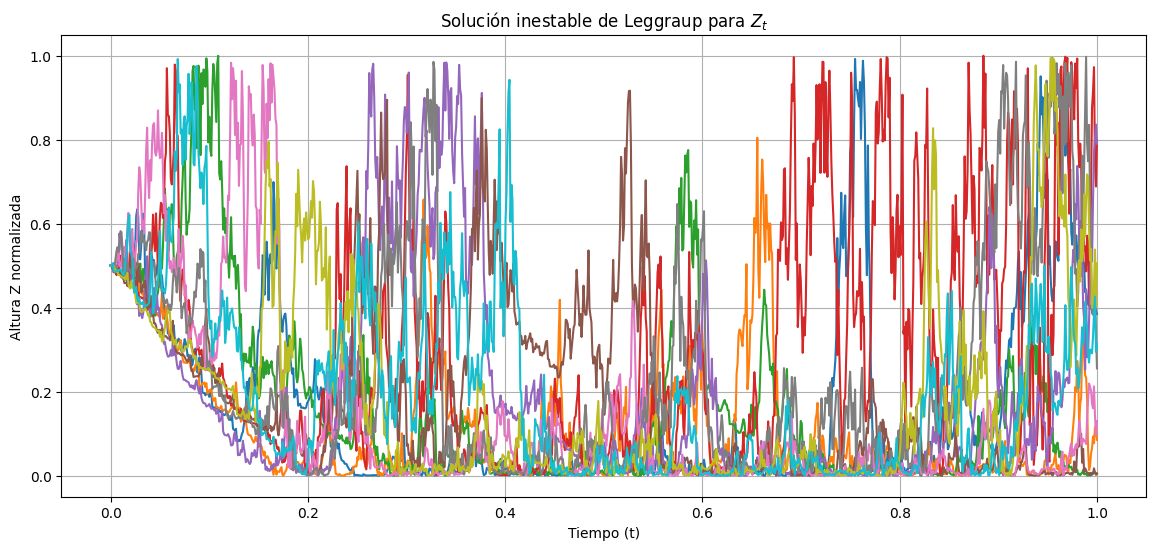

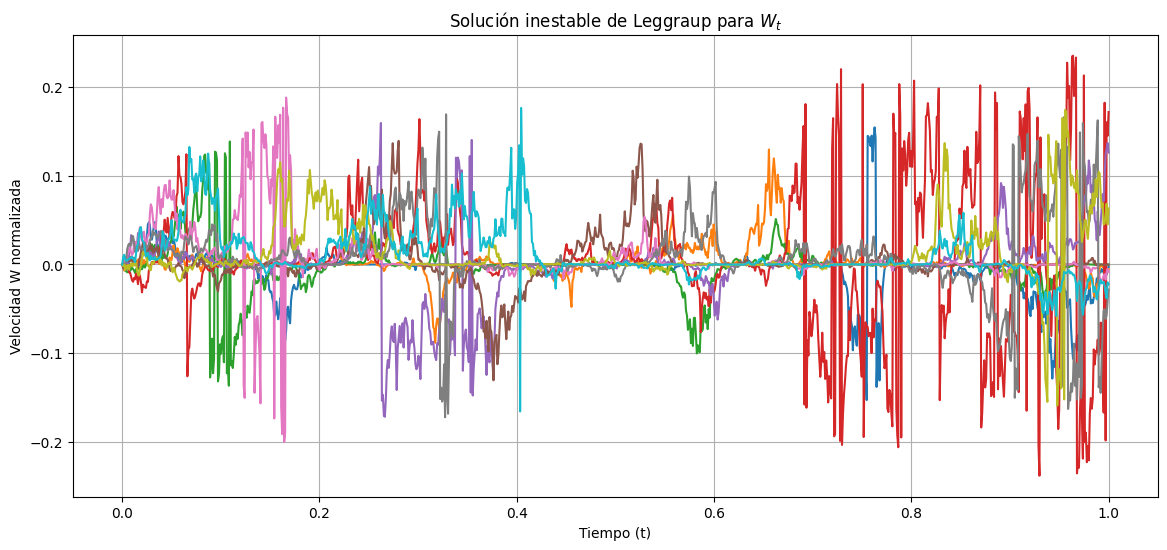

In [ ]:
plt.figure(figsize=(14, 6))
for j in range(N):
  plt.plot(t_ines_leggr, Z_ines_leggr[j], label='Altura del flujo atmosferico ' + str(j))#plottear la altura
plt.title(f'Solución inestable de Leggraup para $Z_t$')
plt.xlabel('Tiempo (t)')
plt.ylabel('Altura Z normalizada')
plt.grid(True)
plt.show()

plt.figure(figsize=(14, 6))
for j in range(N):
  plt.plot(t_ines_leggr, W_ines_leggr[j], label='Velocidad del flujo atmosferico ' + str(j))#plottear la velocidad
plt.title(f'Solución inestable de Leggraup para $W_t$')
plt.xlabel('Tiempo (t)')
plt.ylabel('Velocidad W normalizada')
plt.grid(True)
plt.show()

##Plots caso estable

In [ ]:
#definir elementos base para el caso intestable
sig_estbl = σ[1]
dsig_estbl = dσ[1]
tau_estbl = τ[1]

In [ ]:
#Euler
#generar las 10 trayectorias con el browniano fijo
t_estbl_euler, B_estbl_euler, O_estbl_euler, Z_estbl_euler = SDEEuler(N,K,T,t0,x0,b,s,tau_estbl,sig_estbl,dsig_estbl,B=B_test)
W_estbl_euler = np.zeros((N,K))
for j in range(N):
  for i in range(K):
      W_estbl_euler[j,i] = O_estbl_euler[j,i]*Z_estbl_euler[j,i]

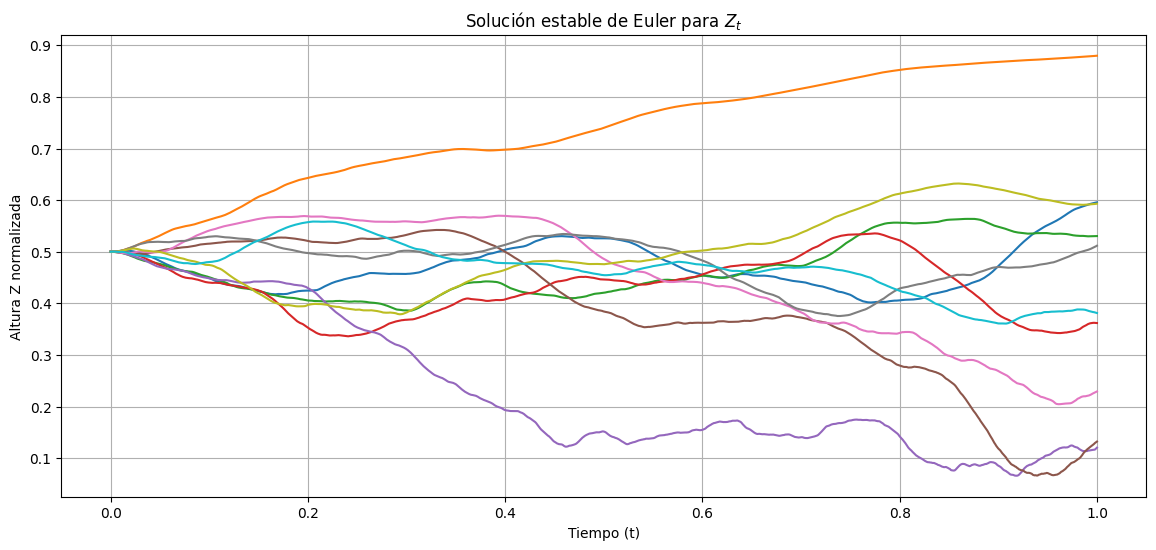

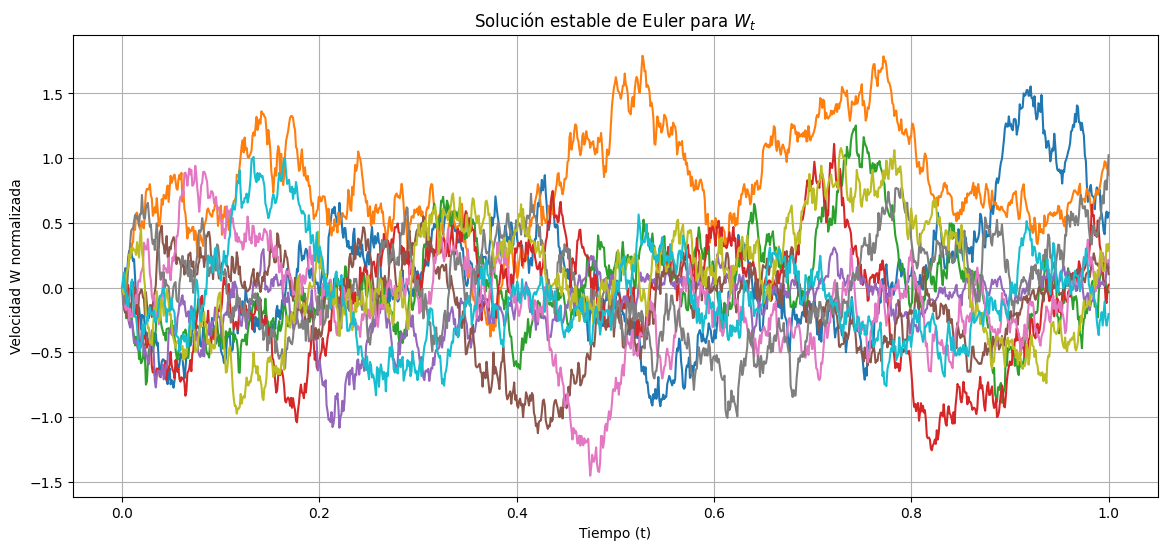

In [ ]:
plt.figure(figsize=(14, 6))
for j in range(N):
  plt.plot(t_estbl_euler, Z_estbl_euler[j], label='Altura del flujo atmosferico ' + str(j))#plottear la altura
plt.title(f'Solución estable de Euler para $Z_t$')
plt.xlabel('Tiempo (t)')
plt.ylabel('Altura Z normalizada')
plt.grid(True)
plt.show()

plt.figure(figsize=(14, 6))
for j in range(N):
  plt.plot(t_estbl_euler, W_estbl_euler[j], label='Velocidad del flujo atmosferico ' + str(j))#plottear la velocidad
plt.title(f'Solución estable de Euler para $W_t$')
plt.xlabel('Tiempo (t)')
plt.ylabel('Velocidad W normalizada')
plt.grid(True)
plt.show()

In [ ]:
#Milstein
#generar las 10 trayectorias con el browniano fijo
t_estbl_milst, B_estbl_milst, O_estbl_milst, Z_estbl_milst = SDEMilstein(N,K,T,t0,x0,b,s,tau_estbl,sig_estbl,dsig_estbl,B=B_test)
W_estbl_milst = np.zeros((N,K))
for j in range(N):
  for i in range(K):
      W_estbl_milst[j,i] = O_estbl_milst[j,i]*Z_estbl_milst[j,i]

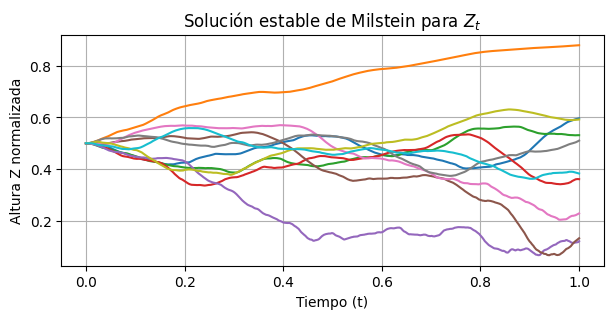

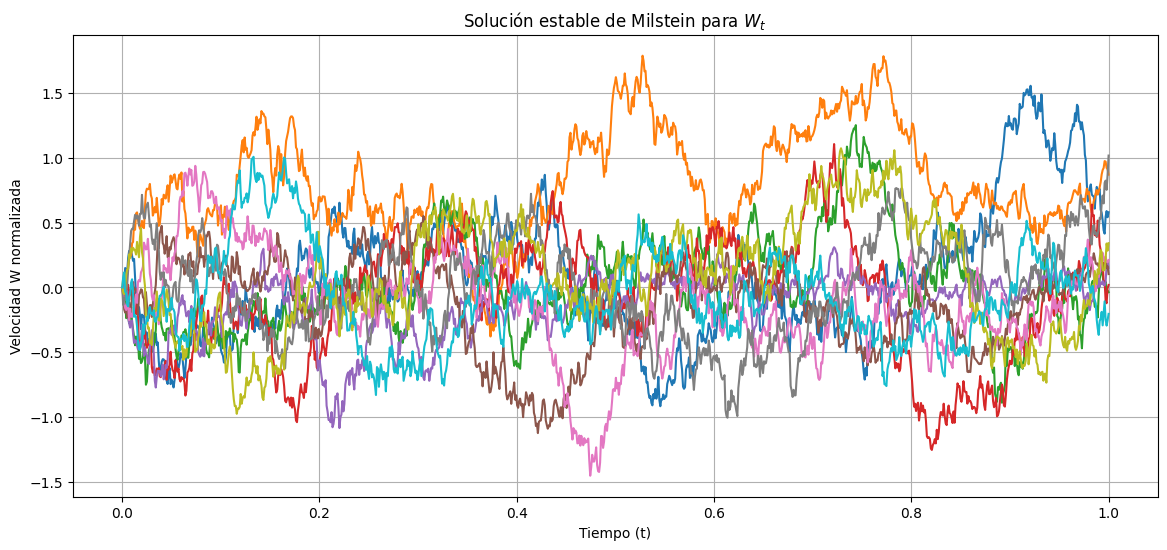

In [40]:
plt.figure(figsize=(7, 3))
for j in range(N):
  plt.plot(t_estbl_milst, Z_estbl_milst[j], label='Altura del flujo atmosferico ' + str(j))#plottear la altura
plt.title(f'Solución estable de Milstein para $Z_t$')
plt.xlabel('Tiempo (t)')
plt.ylabel('Altura Z normalizada')
plt.grid(True)
plt.show()

plt.figure(figsize=(14, 6))
for j in range(N):
  plt.plot(t_estbl_milst, W_estbl_milst[j], label='Velocidad del flujo atmosferico ' + str(j))#plottear la velocidad
plt.title(f'Solución estable de Milstein para $W_t$')
plt.xlabel('Tiempo (t)')
plt.ylabel('Velocidad W normalizada')
plt.grid(True)
plt.show()

In [ ]:
#Honskrii
#generar las 10 trayectorias con el browniano fijo
t_estbl_honsk, B_estbl_honsk, O_estbl_honsk, Z_estbl_honsk = SDEHonskr(N,K,T,t0,x0,b,s,tau_estbl,sig_estbl,dsig_estbl,B=B_test)
W_estbl_honsk = np.zeros((N,K))
for j in range(N):
  for i in range(K):
      W_estbl_honsk[j,i] = O_estbl_honsk[j,i]*Z_estbl_honsk[j,i]

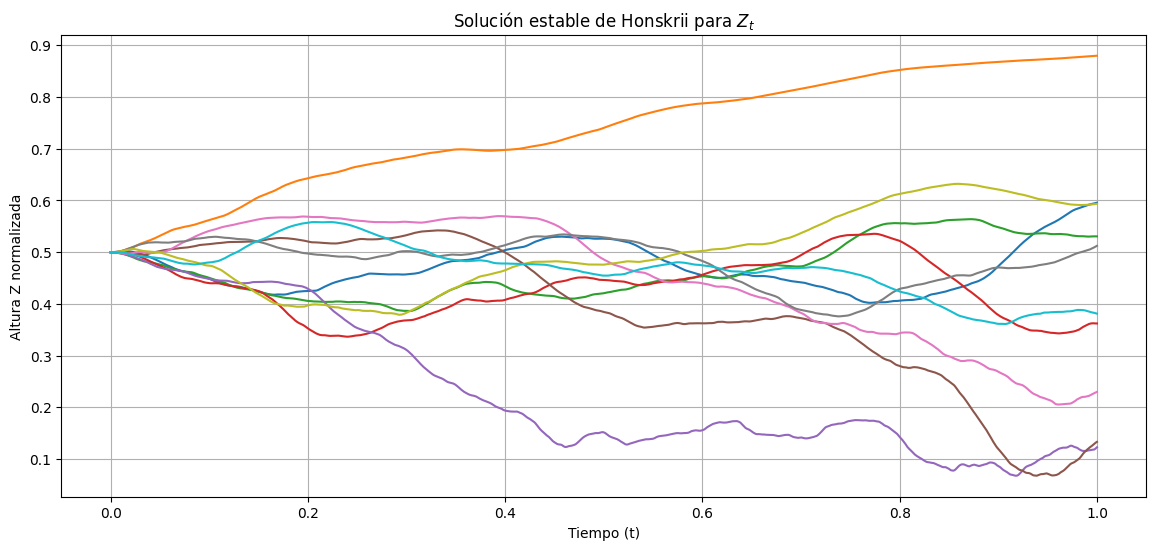

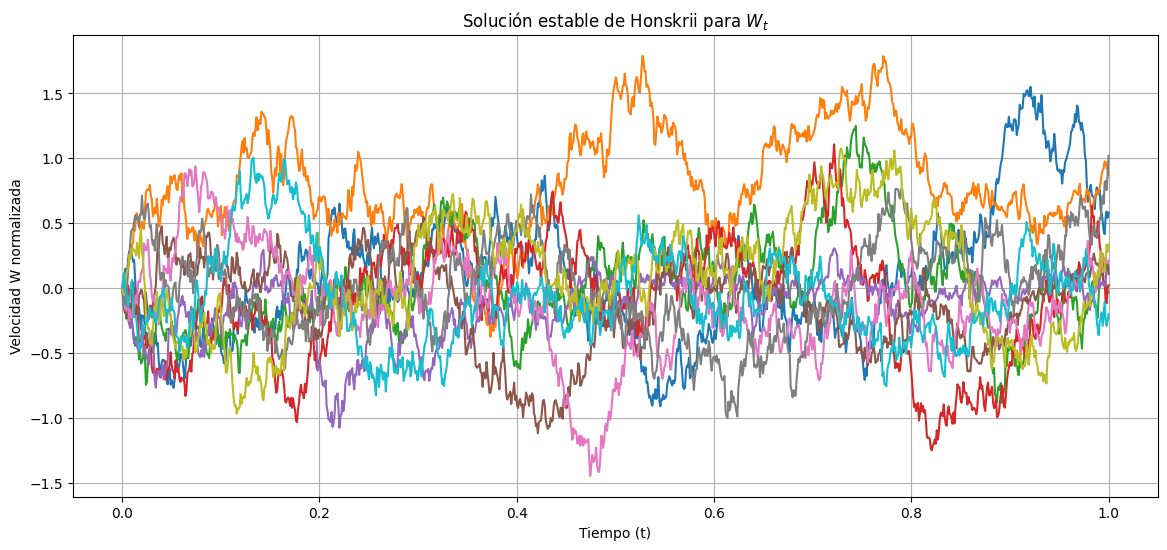

In [ ]:
plt.figure(figsize=(14, 6))
for j in range(N):
  plt.plot(t_estbl_honsk, Z_estbl_honsk[j], label='Altura del flujo atmosferico ' + str(j))#plottear la altura
plt.title(f'Solución estable de Honskrii para $Z_t$')
plt.xlabel('Tiempo (t)')
plt.ylabel('Altura Z normalizada')
plt.grid(True)
plt.show()

plt.figure(figsize=(14, 6))
for j in range(N):
  plt.plot(t_estbl_honsk, W_estbl_honsk[j], label='Velocidad del flujo atmosferico ' + str(j))#plottear la velocidad
plt.title(f'Solución estable de Honskrii para $W_t$')
plt.xlabel('Tiempo (t)')
plt.ylabel('Velocidad W normalizada')
plt.grid(True)
plt.show()

In [ ]:
#Leggraup
#generar las 10 trayectorias con el browniano fijo
t_estbl_leggr, B_estbl_leggr, O_estbl_leggr, Z_estbl_leggr = SDELeggraup(N,K,T,t0,x0,b,s,tau_estbl,sig_estbl,dsig_estbl,B=B_test)
W_estbl_leggr = np.zeros((N,K))
for j in range(N):
  for i in range(K):
      W_estbl_leggr[j,i] = O_estbl_leggr[j,i]*Z_estbl_leggr[j,i]

<ipython-input-4-7964ca742419>:5: RuntimeWarning: divide by zero encountered in double_scalars
  τ = [lambda z: cte,lambda z: 0.1*z**(4/5)/σ[1](z), lambda z: z/(2*σ[2](z)*(1+15*z/eps))]
<ipython-input-3-7e7972c17c10>:169: RuntimeWarning: invalid value encountered in double_scalars
  O[i,j] = R*O[i,j-1] + dσ(Z[i,j-1])*τ(Z[i,j-1])*(1 - R) + (1 - R**2)**1/2*Δ


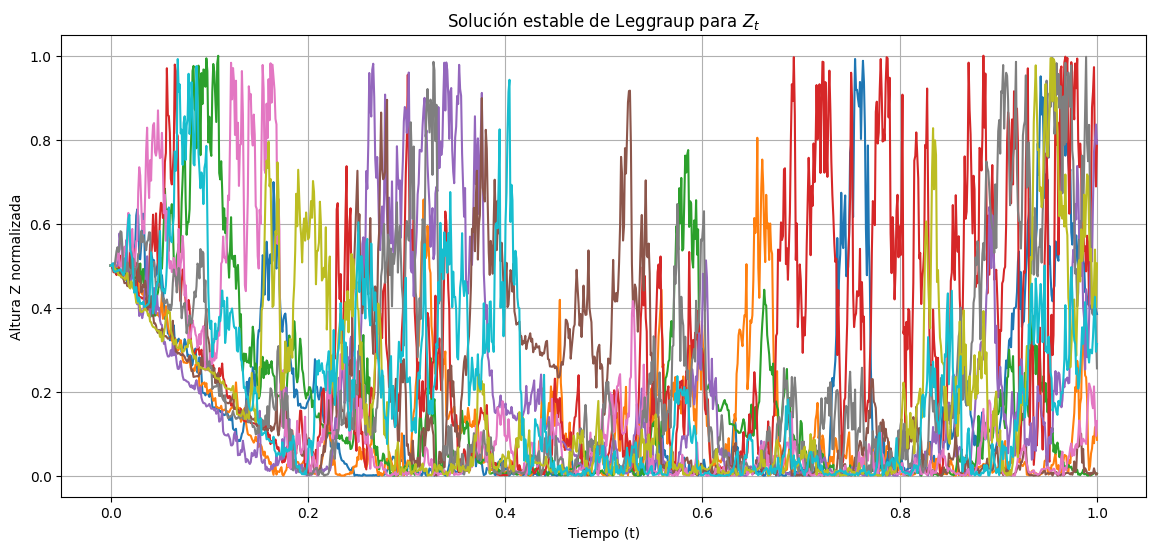

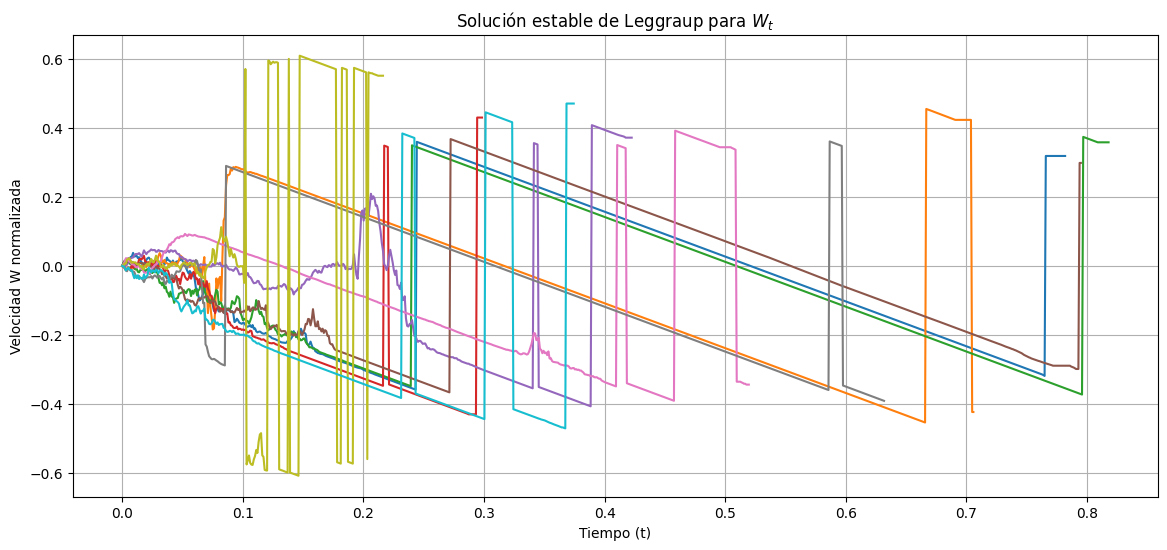

In [ ]:
plt.figure(figsize=(14, 6))
for j in range(N):
  plt.plot(t_ines_leggr, Z_ines_leggr[j], label='Altura del flujo atmosferico ' + str(j))#plottear la altura
plt.title(f'Solución estable de Leggraup para $Z_t$')
plt.xlabel('Tiempo (t)')
plt.ylabel('Altura Z normalizada')
plt.grid(True)
plt.show()

plt.figure(figsize=(14, 6))
for j in range(N):
  plt.plot(t_estbl_leggr, W_estbl_leggr[j], label='Velocidad del flujo atmosferico ' + str(j))#plottear la velocidad
plt.title(f'Solución estable de Leggraup para $W_t$')
plt.xlabel('Tiempo (t)')
plt.ylabel('Velocidad W normalizada')
plt.grid(True)
plt.show()

##Plots caso neutral

In [ ]:
#definir elementos base para el caso intestable
sig_neutr = σ[2]
dsig_neutr = dσ[2]
tau_neutr = τ[2]

In [ ]:
#Euler
#generar las 10 trayectorias con el browniano fijo
t_neutr_euler, B_neutr_euler, O_neutr_euler, Z_neutr_euler = SDEEuler(N,K,T,t0,x0,b,s,tau_neutr,sig_neutr,dsig_neutr,B=B_test)
W_neutr_euler = np.zeros((N,K))
for j in range(N):
  for i in range(K):
      W_neutr_euler[j,i] = O_neutr_euler[j,i]*Z_neutr_euler[j,i]

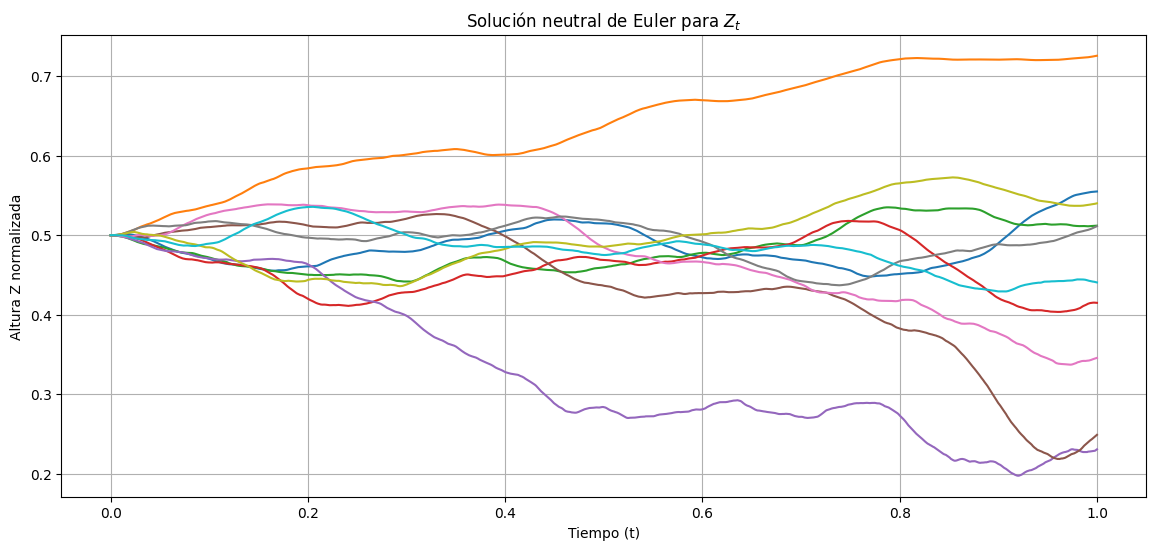

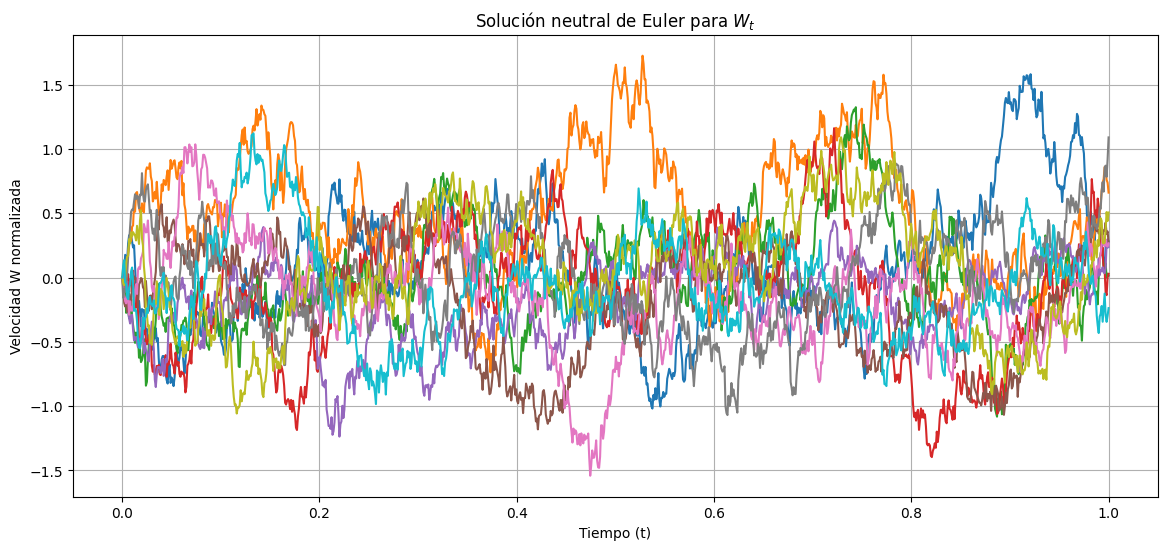

In [ ]:
plt.figure(figsize=(14, 6))
for j in range(N):
  plt.plot(t_neutr_euler, Z_neutr_euler[j], label='Altura del flujo atmosferico ' + str(j))#plottear la altura
plt.title(f'Solución neutral de Euler para $Z_t$')
plt.xlabel('Tiempo (t)')
plt.ylabel('Altura Z normalizada')
plt.grid(True)
plt.show()

plt.figure(figsize=(14, 6))
for j in range(N):
  plt.plot(t_neutr_euler, W_neutr_euler[j], label='Velocidad del flujo atmosferico ' + str(j))#plottear la velocidad
plt.title(f'Solución neutral de Euler para $W_t$')
plt.xlabel('Tiempo (t)')
plt.ylabel('Velocidad W normalizada')
plt.grid(True)
plt.show()

In [ ]:
#Milstein
#generar las 10 trayectorias con el browniano fijo
t_neutr_milst, B_neutr_milst, O_neutr_milst, Z_neutr_milst = SDEMilstein(N,K,T,t0,x0,b,s,tau_neutr,sig_neutr,dsig_neutr,B=B_test)
W_neutr_milst = np.zeros((N,K))
for j in range(N):
  for i in range(K):
      W_neutr_milst[j,i] = O_neutr_milst[j,i]*Z_neutr_milst[j,i]

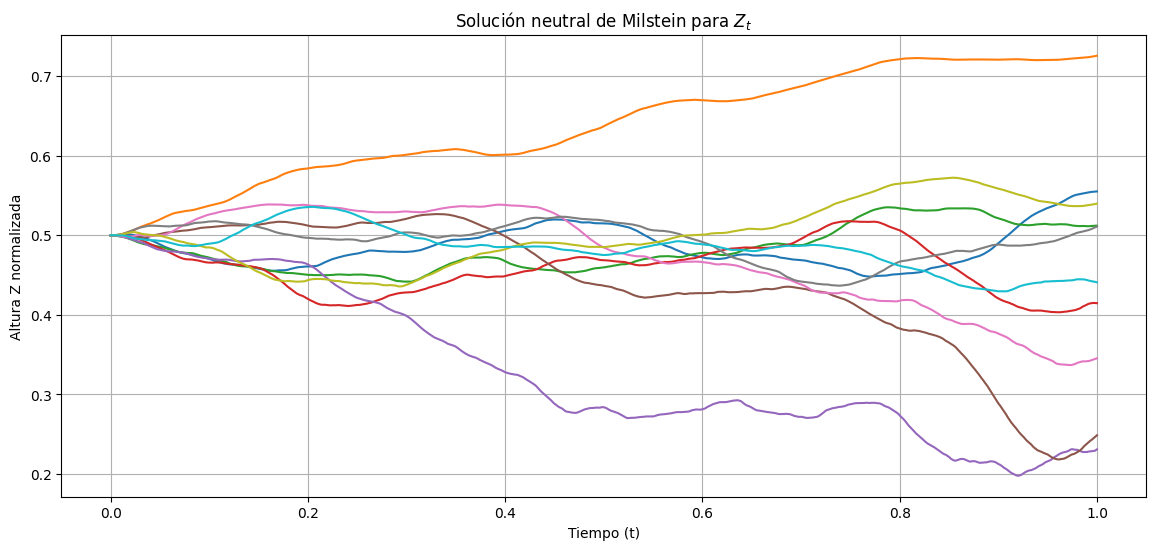

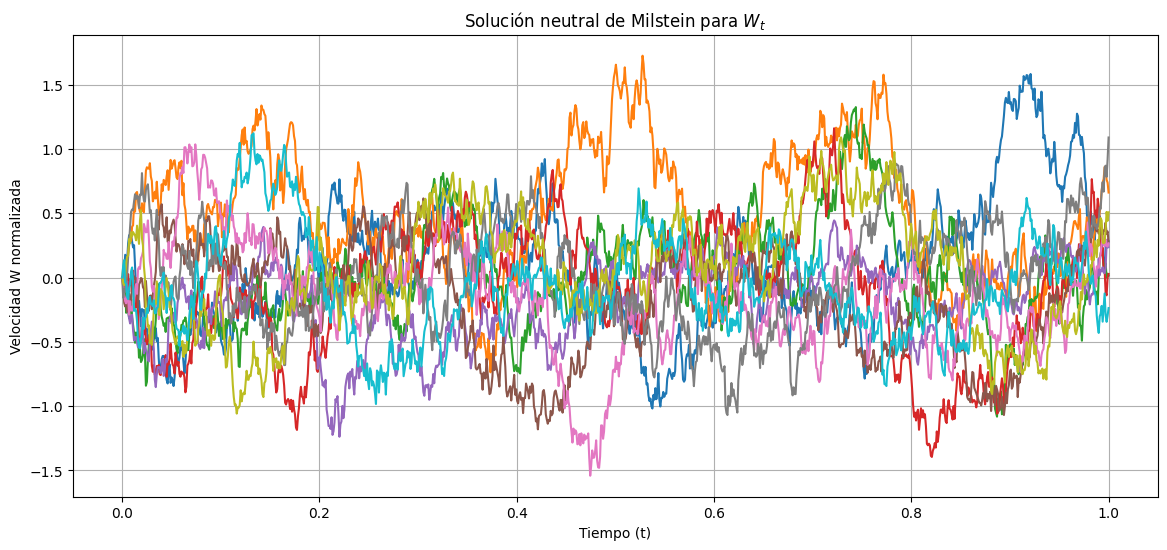

In [ ]:
plt.figure(figsize=(14, 6))
for j in range(N):
  plt.plot(t_neutr_milst, Z_neutr_milst[j], label='Altura del flujo atmosferico ' + str(j))#plottear la altura
plt.title(f'Solución neutral de Milstein para $Z_t$')
plt.xlabel('Tiempo (t)')
plt.ylabel('Altura Z normalizada')
plt.grid(True)
plt.show()

plt.figure(figsize=(14, 6))
for j in range(N):
  plt.plot(t_neutr_milst, W_neutr_milst[j], label='Velocidad del flujo atmosferico ' + str(j))#plottear la velocidad
plt.title(f'Solución neutral de Milstein para $W_t$')
plt.xlabel('Tiempo (t)')
plt.ylabel('Velocidad W normalizada')
plt.grid(True)
plt.show()

In [ ]:
#Honskrii
#generar las 10 trayectorias con el browniano fijo
t_neutr_honsk, B_neutr_honsk, O_neutr_honsk, Z_neutr_honsk = SDEHonskr(N,K,T,t0,x0,b,s,tau_neutr,sig_neutr,dsig_neutr,B=B_test)
W_neutr_honsk = np.zeros((N,K))
for j in range(N):
  for i in range(K):
      W_neutr_honsk[j,i] = O_neutr_honsk[j,i]*Z_neutr_honsk[j,i]

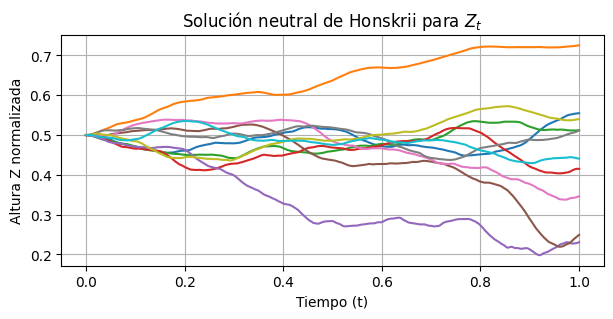

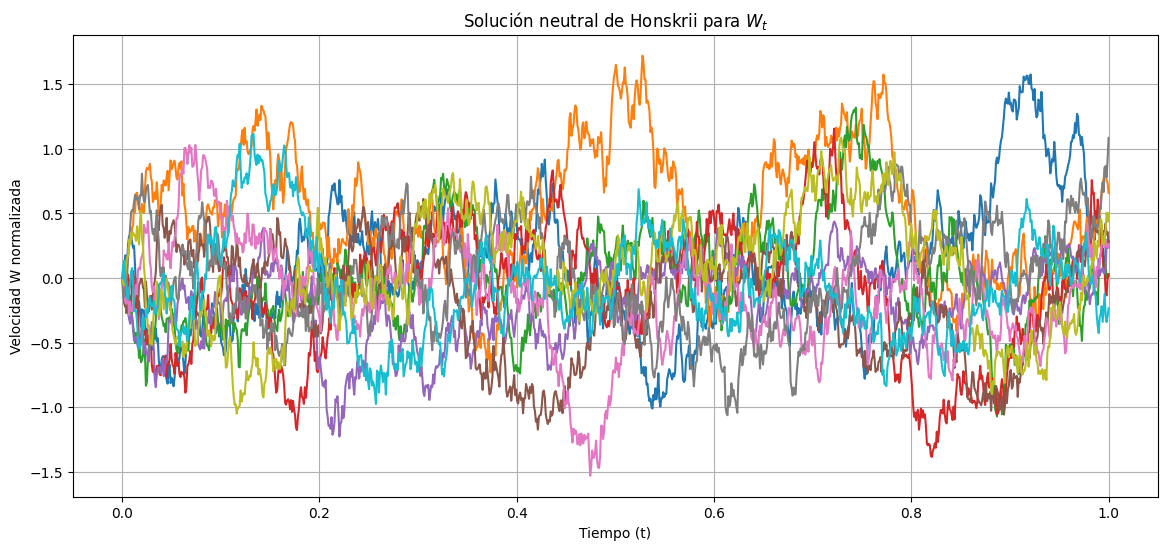

In [41]:
plt.figure(figsize=(7, 3))
for j in range(N):
  plt.plot(t_neutr_honsk, Z_neutr_honsk[j], label='Altura del flujo atmosferico ' + str(j))#plottear la altura
plt.title(f'Solución neutral de Honskrii para $Z_t$')
plt.xlabel('Tiempo (t)')
plt.ylabel('Altura Z normalizada')
plt.grid(True)
plt.show()

plt.figure(figsize=(14, 6))
for j in range(N):
  plt.plot(t_neutr_honsk, W_neutr_honsk[j], label='Velocidad del flujo atmosferico ' + str(j))#plottear la velocidad
plt.title(f'Solución neutral de Honskrii para $W_t$')
plt.xlabel('Tiempo (t)')
plt.ylabel('Velocidad W normalizada')
plt.grid(True)
plt.show()

In [ ]:
#Leggraup
#generar las 10 trayectorias con el browniano fijo
t_neutr_leggr, B_neutr_leggr, O_neutr_leggr, Z_neutr_leggr = SDELeggraup(N,K,T,t0,x0,b,s,tau_neutr,sig_neutr,dsig_neutr,B=B_test)
W_neutr_leggr = np.zeros((N,K))
for j in range(N):
  for i in range(K):
      W_neutr_leggr[j,i] = O_neutr_leggr[j,i]*Z_neutr_leggr[j,i]

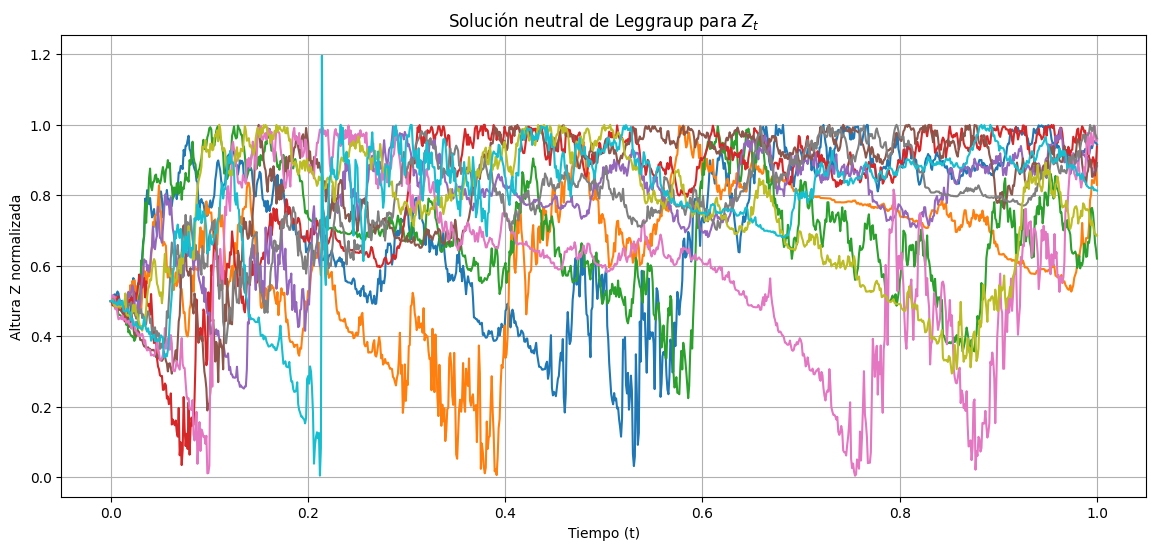

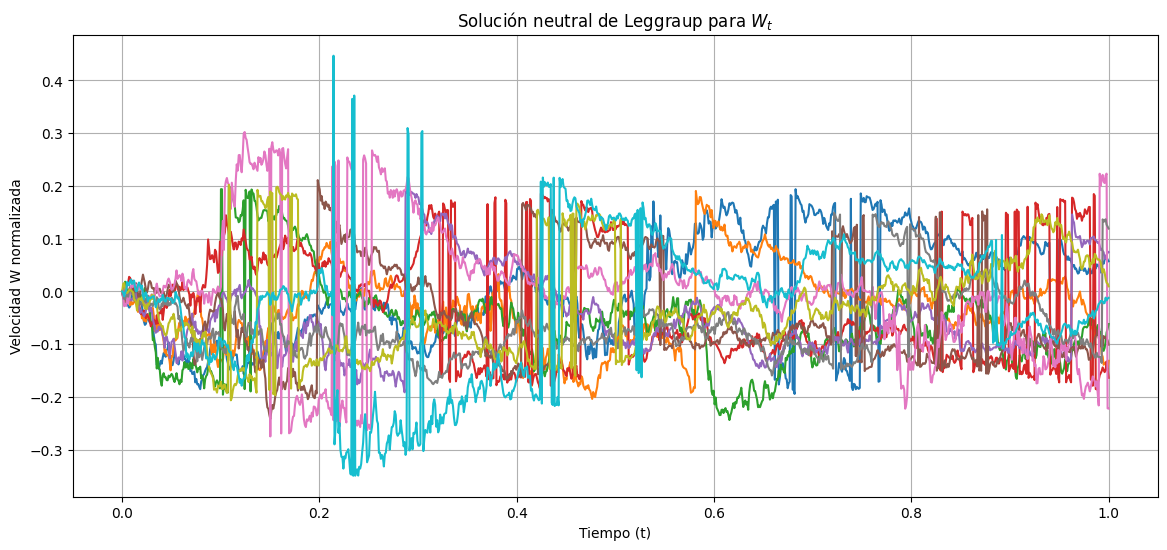

In [ ]:
plt.figure(figsize=(14, 6))
for j in range(N):
  plt.plot(t_neutr_leggr, Z_neutr_leggr[j], label='Altura del flujo atmosferico ' + str(j))#plottear la altura
plt.title(f'Solución neutral de Leggraup para $Z_t$')
plt.xlabel('Tiempo (t)')
plt.ylabel('Altura Z normalizada')
plt.grid(True)
plt.show()

plt.figure(figsize=(14, 6))
for j in range(N):
  plt.plot(t_neutr_leggr, W_neutr_leggr[j], label='Velocidad del flujo atmosferico ' + str(j))#plottear la velocidad
plt.title(f'Solución neutral de Leggraup para $W_t$')
plt.xlabel('Tiempo (t)')
plt.ylabel('Velocidad W normalizada')
plt.grid(True)
plt.show()

##Estudio de diferencias

Por como resultó Leggraup, no se considerará este. Además se estudiará la posición final de la partícula

In [ ]:
suma_error_abs_ines_Euler_Milst = sum(abs(Z_ines_euler[j,-1] - Z_ines_milst[j,-1]) for j in range(N))
suma_error_abs_ines_Euler_Honsk = sum(abs(Z_ines_euler[j,-1] - Z_ines_honsk[j,-1]) for j in range(N))
suma_error_abs_ines_Milst_Honsk = sum(abs(Z_ines_milst[j,-1] - Z_ines_honsk[j,-1]) for j in range(N))
print(suma_error_abs_ines_Euler_Milst)
print(suma_error_abs_ines_Euler_Honsk)
print(suma_error_abs_ines_Milst_Honsk)

0.005155799200001462
0.04330068093297118
0.044547458482343635


Por lo tanto, en el caso inestable el método de Honski es el que más se aleja de ambos, pero considerando el intervalo 0-1 de altura, entonces los 3 modelos funcionan similar, pues el error acumulado de las posiciones finales es bajo, por lo que para efectos prácticos se usará el método de Euler en el caso inestable.

In [ ]:
suma_error_abs_estbl_Euler_Milst = sum(abs(Z_estbl_euler[j,-1] - Z_estbl_milst[j,-1]) for j in range(N))
suma_error_abs_estbl_Euler_Honsk = sum(abs(Z_estbl_euler[j,-1] - Z_estbl_honsk[j,-1]) for j in range(N))
suma_error_abs_estbl_Milst_Honsk = sum(abs(Z_estbl_milst[j,-1] - Z_estbl_honsk[j,-1]) for j in range(N))
print(suma_error_abs_estbl_Euler_Milst)
print(suma_error_abs_estbl_Euler_Honsk)
print(suma_error_abs_estbl_Milst_Honsk)

0.007933398856934878
0.006485248213453171
0.01320440622631501


Según estos datos el que más resulta alejarse del resto es Milstein con Honskrii

In [ ]:
suma_error_abs_neutr_Euler_Milst = sum(abs(Z_neutr_euler[j,-1] - Z_neutr_milst[j,-1]) for j in range(N))
suma_error_abs_neutr_Euler_Honsk = sum(abs(Z_neutr_euler[j,-1] - Z_neutr_honsk[j,-1]) for j in range(N))
suma_error_abs_neutr_Milst_Honsk = sum(abs(Z_neutr_milst[j,-1] - Z_neutr_honsk[j,-1]) for j in range(N))
print(suma_error_abs_neutr_Euler_Milst)
print(suma_error_abs_neutr_Euler_Honsk)
print(suma_error_abs_neutr_Milst_Honsk)

0.00241090905237093
0.0017152932854221925
0.0033884149099342176


De este método solo se distanció Honskrii, mientras que los otros 2 terminaron en la misma posición. Se concluye que todos los métodos eran altamente eficientes para 1000 particiones de de una unidad de tiempo.

##Diferencias entre los gráficos

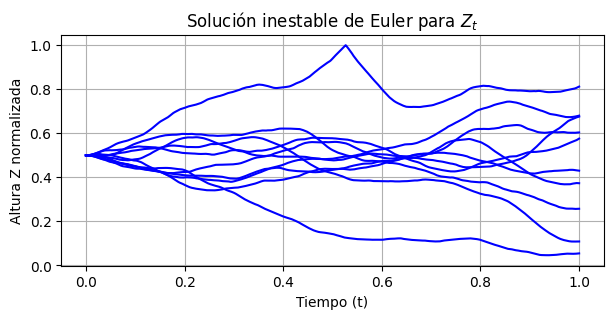

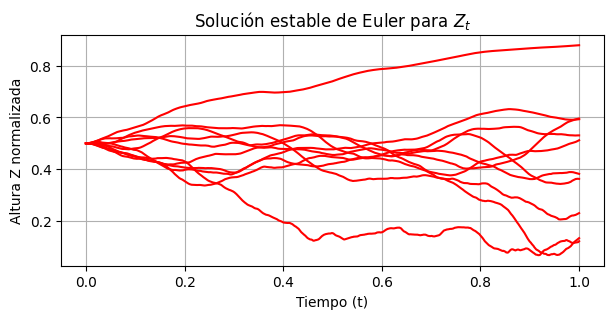

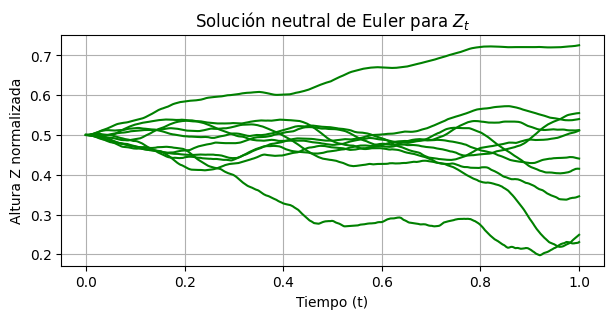

In [42]:
plt.figure(figsize=(7, 3))
for j in range(int(N)):
  plt.plot(t_ines_euler, Z_ines_euler[j], label='Altura del flujo atmosferico ' + str(j),color='blue')#plottear la altura
plt.title(f'Solución inestable de Euler para $Z_t$')
plt.xlabel('Tiempo (t)')
plt.ylabel('Altura Z normalizada')
plt.grid(True)
plt.show()

plt.figure(figsize=(7, 3))
for j in range(int(N)):
  plt.plot(t_estbl_euler, Z_estbl_euler[j], label='Altura del flujo atmosferico ' + str(j),color='red')#plottear la altura
plt.title(f'Solución estable de Euler para $Z_t$')
plt.xlabel('Tiempo (t)')
plt.ylabel('Altura Z normalizada')
plt.grid(True)
plt.show()

plt.figure(figsize=(7, 3))
for j in range(int(N)):
  plt.plot(t_neutr_euler, Z_neutr_euler[j], label='Altura del flujo atmosferico ' + str(j),color='green')#plottear la altura
plt.title(f'Solución neutral de Euler para $Z_t$')
plt.xlabel('Tiempo (t)')
plt.ylabel('Altura Z normalizada')
plt.grid(True)
plt.show()

De primeras la mayor diferencia entre los modelos es que el modelo inestable tiende a irse más rápidamente a los extremos y dispersarse más, pues se ve que las posiciones finales distribuyen casi uniformemente entre 0 y 0.8. Los siguientes 2 modelos son bastante similares, pero tienen leves diferencias en las pendientes en algunos puntos, especialmente en las 2 partículas extremas, donde la solución neutral tiene pendientes más suaves en la inferior, al contrario de la estable. Respecto a como distribuyen estas 2. la estable resulta levemente más uniforme que neutral.

##Elementos random

Generación de imágenes para posterior animación

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import imageio

y=Z_estbl_euler[0,:]

filenames = []
for i in range(len(y)):
  if i%100==0 or i==range(len(y))[-1]:
    # plot the line chart
    plt.figure(figsize=(14, 6))
    plt.plot(t_estbl_euler[:i],Z_estbl_euler[0,:i])
    plt.plot(t_estbl_euler[:i],Z_estbl_euler[1,:i])
    plt.plot(t_estbl_euler[:i],Z_estbl_euler[2,:i])
    plt.plot(t_estbl_euler[:i],Z_estbl_euler[3,:i])
    plt.plot(t_estbl_euler[:i],Z_estbl_euler[4,:i])
    plt.plot(t_estbl_euler[:i],Z_estbl_euler[5,:i])
    plt.plot(t_estbl_euler[:i],Z_estbl_euler[6,:i])
    plt.plot(t_estbl_euler[:i],Z_estbl_euler[7,:i])
    plt.plot(t_estbl_euler[:i],Z_estbl_euler[8,:i])
    plt.plot(t_estbl_euler[:i],Z_estbl_euler[9,:i])
    plt.title(f"Solución estable de Euler para $Z_t$")
    plt.ylabel(f"Z_t")
    plt.xlabel("Tiempo t")
    plt.ylim(0,1)
    plt.xlim(0,1)
    plt.savefig("img_est"+str(int(i/10))+".png")
    plt.close()


##INTENTO DE CALCULAR EL ERROR CON C


In [ ]:
def estimacion_Ck(arreglo_z,arreglo_t,k,sigma_w,tau_w,desvstd_z):
  dim_z = len(arreglo_z)
  dim_t = len(arreglo_t)
  Ck = np.zeros((dim_z,dim_t))
  Czero_0 = (1/(np.sqrt(2*np.pi)*desvstd_z))*np.exp(-(z-z0)**2/(2*desvstd_z))
  #falta la implementación para el resto de los CK, se debería usar runge-kutta 4

  return Ck


def concentracion_p(orden, w,grilla_z,grilla_t):
  norm = 1/np.sqrt(2*np.pi)
  #para tener el hermite de la tesis se debe considerar
  #x como  w/sqrt(2) para tener los pol de hermite de la tesis
  lista_hermite = [special.hermite(k) for k in range(orden)]



def c_barra(z,t,hb=1,iteraciones=10**5):
  Kernel_gauss = lambda x: 2*np.pi * exp(-x**2 /2)
